# Homework 03

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path
import sys

### Experiencing with numpy

In [10]:
a = np.array([1,2,3,4])
b = np.array([4,16,64,256,1249])

print(b.mean())

print([x**2 for x in a])
print(np.array([x**2 for x in a]))

print(a ** 2)

print(np.sqrt(b))

317.8
[np.int64(1), np.int64(4), np.int64(9), np.int64(16)]
[ 1  4  9 16]
[ 1  4  9 16]
[ 2.          4.          8.         16.         35.34119409]


### Reading db 

In [11]:
df = pd.read_csv('../data/starter_data.csv')

df.head()



,category,value,date
0,A,10,2025-08-01
1,B,15,2025-08-02
2,A,12,2025-08-03
3,B,18,2025-08-04
4,C,25,2025-08-05


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   value     10 non-null     int64 
 2   date      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


In [13]:
df.describe()

,value
count,10.000000
mean,17.600000
std,7.381659
min,10.000000
25%,12.250000
50%,14.500000
75%,23.250000
max,30.000000


In [14]:
# def print_column_names(df):
#     print("Names: ")
#     print(*list(df.columns))

# def nb_entries_and_mean(df, column):
#     return {"nb_entries": len(df), "mean": float(np.mean(df[column]))}

PROJECT_ROOT = Path.cwd().parent

sys.path.append(str(PROJECT_ROOT))

from src.utils import *

print_column_names(df)

nb_entries_and_mean(df, "value")

Names: 
category value date


{'nb_entries': 10, 'mean': 17.6}

In [15]:
summary = df.groupby('category').mean(numeric_only=True).reset_index()

#creating the proceessd folder
saved_path = Path("../data/processed/summary.csv")

saved_path.parent.mkdir(parents=True, exist_ok=True)

summary.to_csv(saved_path, index=False)

summary


,category,value
0,A,11.500000
1,B,15.666667
2,C,27.666667


### Playing with plots


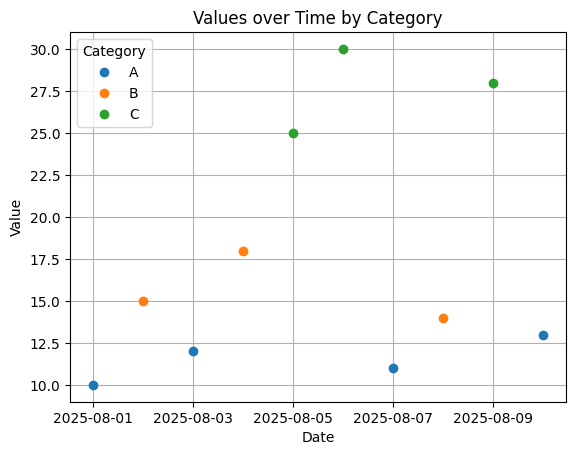

In [16]:
df = df.sort_values("date")

df_piv = df.pivot(index="date", columns="category", values="value")

df_piv.plot(style="o")

plt.title("Values over Time by Category")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(title="Category")
plt.grid(True)

plt.savefig('../data/processed/histogram.png')

plt.show()
